
<img src="..\assets\maco7.png" align="left" style='width:1000px'/>
 
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

<h1>Tutorial : image composition </h1><hr style="border-width:2px;border-color:black">



<span>
    This tutorial is dedicated to image composition based on <a href="https://github.com/akTwelve/cocosynth">Adam Kelly implementation</a>. We're providing the script to generate images from scratch based on a set of backgrounds and foregrounds images. Source code has been adapted to match <a href="http://tacodataset.org/">taco dataset</a> structure adding background and foreground categories.
</span>


<img src="..\assets\image_composition.png" align="left" style='width:1000px'/>

## Background categories


Background images are stored in the directory **backgrounds** and are divided into different directories, each defining a category.
    

<img src="..\assets\background_structure.png" align="center" style='width:300px'/>

In [1]:
import glob
print("Background categories:")
for f in glob.glob("../datasets/trash_composition/backgrounds/*", recursive=True):
    print(f)

Background categories:
../datasets/trash_composition/backgrounds\Indoor, Man-made
../datasets/trash_composition/backgrounds\Pavement
../datasets/trash_composition/backgrounds\Sand, Dirt, Pebbles
../datasets/trash_composition/backgrounds\Trash
../datasets/trash_composition/backgrounds\Vegetation
../datasets/trash_composition/backgrounds\Water


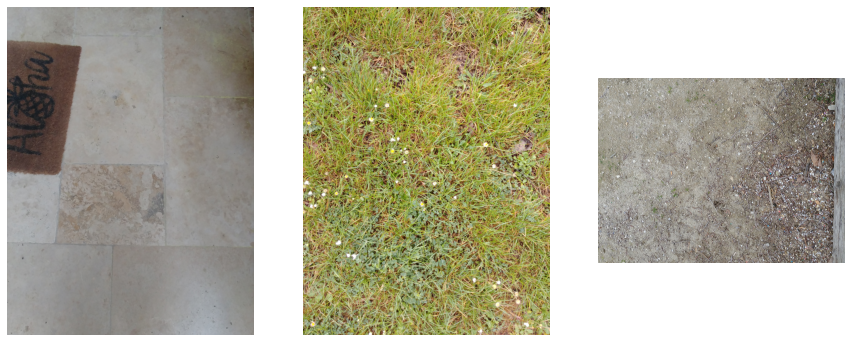

In [2]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.axis('off')
filepath = "../datasets/trash_composition/backgrounds/Indoor, Man-made/20220420_100002.jpg"
img = cv2.imread(filepath)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

plt.subplot(1,3,2)
plt.axis('off')
filepath = "../datasets/trash_composition/backgrounds/Vegetation/20220424_105556.jpg"
img = cv2.imread(filepath)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

plt.subplot(1,3,3)
plt.axis('off')
filepath = "../datasets/trash_composition/backgrounds/Sand, Dirt, Pebbles/20220423_111130.jpg."
img = cv2.imread(filepath)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

## Foreground categories



Foreground images are stored in the **foregrounds** directory and are divided into different directories, each defining a super category. A super category can include multipule categories.
    
    
<img src="..\assets\foreground_structure.png" align="center" style='width:400px'/>

In [3]:
import glob
print("Foreground categories:")
for f in glob.glob("../datasets/trash_composition/foregrounds/*"):
    print("super category: ",f)
    for ff in glob.glob(f+"/*"):
        print("   ...category: ",ff)

Foreground categories:
super category:  ../datasets/trash_composition/foregrounds\Cigarette
   ...category:  ../datasets/trash_composition/foregrounds\Cigarette\Cigarette
super category:  ../datasets/trash_composition/foregrounds\Mask
   ...category:  ../datasets/trash_composition/foregrounds\Mask\mask


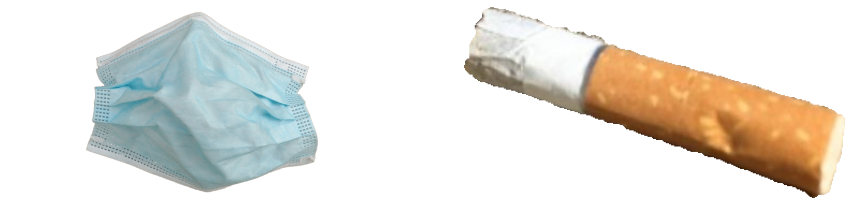

In [4]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis('off')
filepath = "../datasets/trash_composition/foregrounds/Mask/mask/20220411_144352.png"
image = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
im_rgb= cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
plt.imshow(im_rgb)

plt.subplot(1,2,2)
plt.axis('off')
filepath = "../datasets/trash_composition/foregrounds/Cigarette/Cigarette/20220421_200022.png"
image = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
im_rgb= cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
plt.imshow(im_rgb)

## Image generation

We will generate an image from :
- one background image of Sand, Dirt, Pebbles
- one foreground image of Cigarette
- one foreground image of Mask

In [5]:
def show_image(image, title=''):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.title(title + " shape="+str(image.shape))
    plt.imshow(image)
def show_image_and_mask(image, mask, title=''):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title(title+" Image shape="+str(image.shape))
    plt.axis('off')
    plt.imshow(image)
    #
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title(title+" Mask shape="+str(mask.shape))
    plt.imshow(mask) 

# Prepare background image

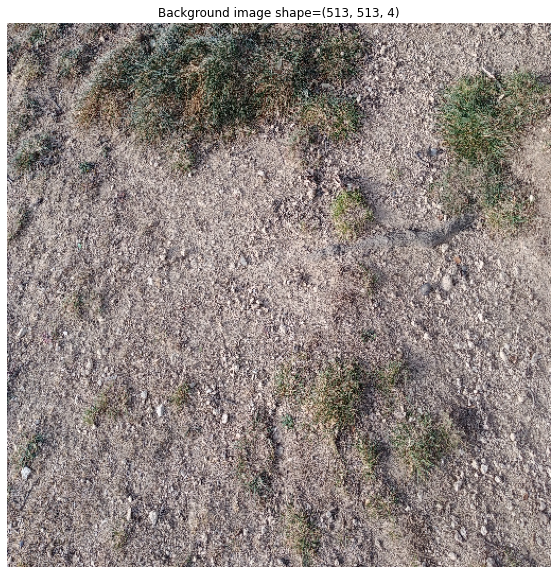

In [6]:
import matplotlib.pyplot as plt
import cv2
background_path = "../datasets/trash_composition/backgrounds/Sand, Dirt, Pebbles/20220413_083454.jpg"
def load_and_resize_image(background_path):
    background = cv2.imread(background_path)
    background = cv2.cvtColor(background, cv2.COLOR_BGR2RGBA)
    return cv2.resize(background, (513,513), interpolation=cv2.INTER_CUBIC)
background = load_and_resize_image(background_path)
show_image(background, title='Background image')

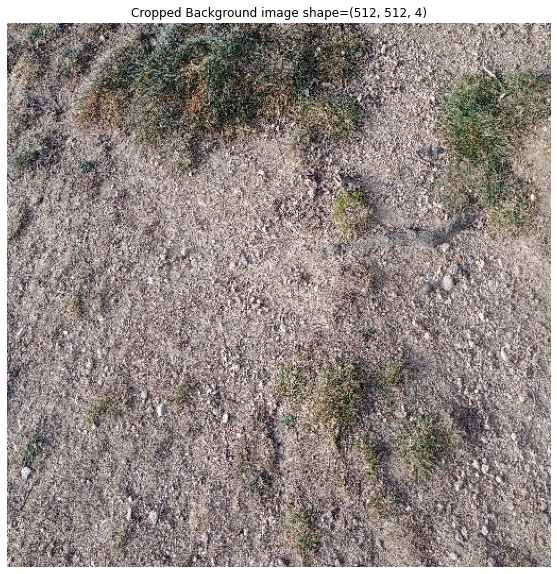

In [7]:
import random
# crop
def crop_image(image):
    img_width, img_height = image.shape[:2]
    max_crop_x_pos = img_width - 512
    max_crop_y_pos = img_height - 512
    crop_x_pos = random.randint(0, max_crop_x_pos)
    crop_y_pos = random.randint(0, max_crop_y_pos)
    return image[crop_x_pos:crop_x_pos + 512, crop_y_pos:crop_y_pos + 512, :]
composite = crop_image(background)
show_image(composite, title='Cropped Background image')

# Foregrounds Transformations

Foreground images submit a few transformations to add variability in image composition. 

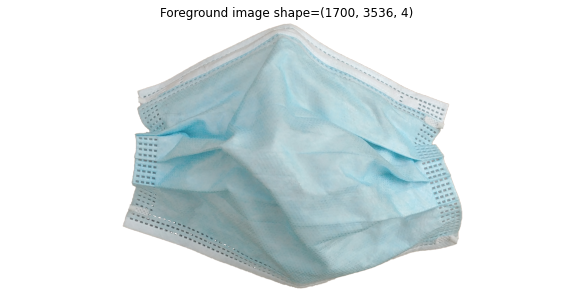

In [8]:
import imutils
import numpy as np
# Load foregrounds
foreground_path = "../datasets/trash_composition/foregrounds/Mask/mask/20220411_144352.png"
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    return cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
fg_image = load_image(foreground_path)
show_image(fg_image, title='Foreground image')

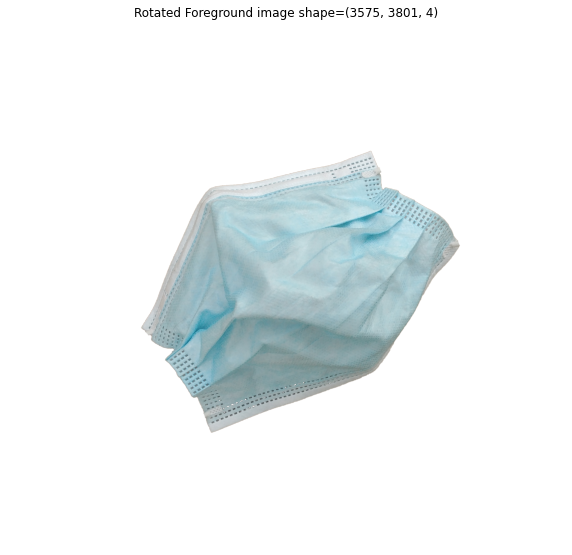

In [9]:
def random_rotation(image):
    angle_degrees = random.randint(0, 359)
    return imutils.rotate_bound(image, angle_degrees)
fg_image=random_rotation(fg_image)
show_image(fg_image, title='Rotated Foreground image')

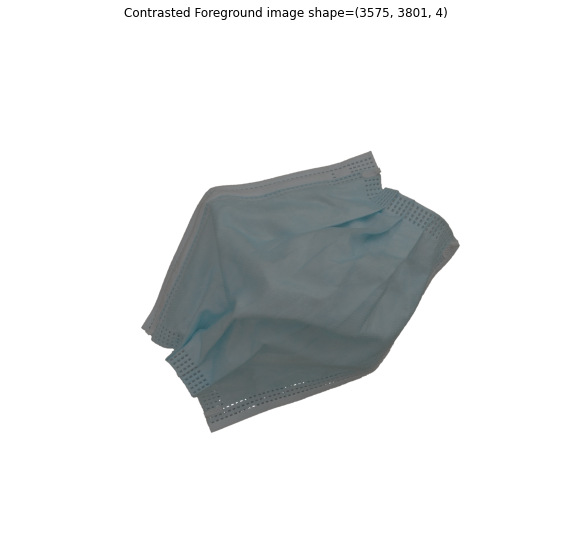

In [10]:
# change brightness
def cv2_enhance_contrast(img, factor):
    rgb_img = img[:,:,:3]
    mean = np.uint8(cv2.mean(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY))[0])
    img_deg = np.ones_like(rgb_img) * mean
    img_brgth = cv2.addWeighted(rgb_img, factor, img_deg, 1-factor, 0.0)
    return np.dstack((img_brgth,img[:,:,3]))
fg_image=cv2_enhance_contrast(fg_image,0.4)
show_image(fg_image, title='Contrasted Foreground image')

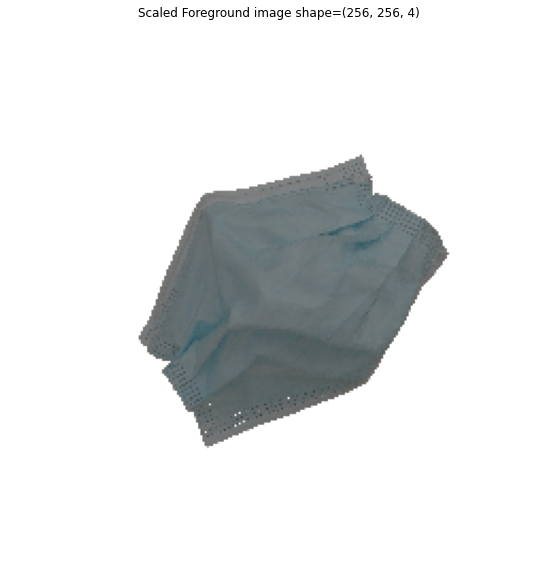

In [11]:
# Scale the foreground
def scale_image(image, scale, size):
    new_lengthx = scale * size[0]
    new_lengthy = scale * size[1]
    new_size = (int(new_lengthx), int(new_lengthy))
    return cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)
fg_image=scale_image(fg_image,0.5,composite.shape)
show_image(fg_image, title='Scaled Foreground image')

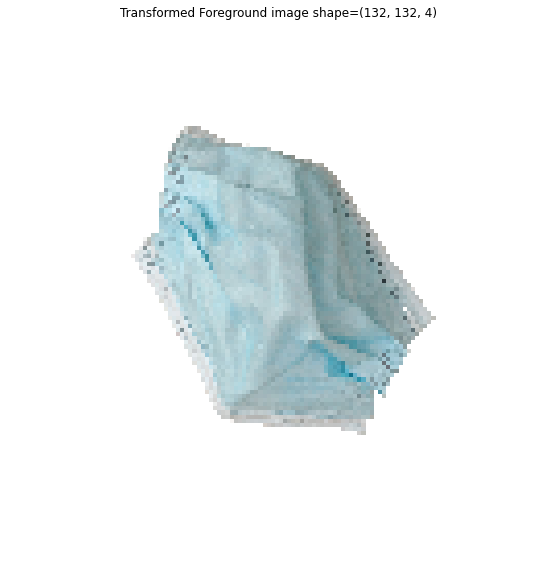

In [12]:
#foreground
import imutils

def transform_foreground(image_path, relative_scale, composite):
    # load image
    image = load_image(image_path)

    # Rotation
    image = random_rotation(image)

    # Adjust foreground brightness
    brightness_factor = random.random() * .4 + .7 # Pick something between .7 and 1.1
    image = cv2_enhance_contrast(image, brightness_factor)
    
    # Scale foreground
    scale = random.uniform(0.2, 0.5)*relative_scale
    image = scale_image(image,scale,composite.shape)
    
    return image

fg_image = transform_foreground(foreground_path, 1., composite)
show_image(fg_image, title='Transformed Foreground image')

# Paste foreground image onto background image

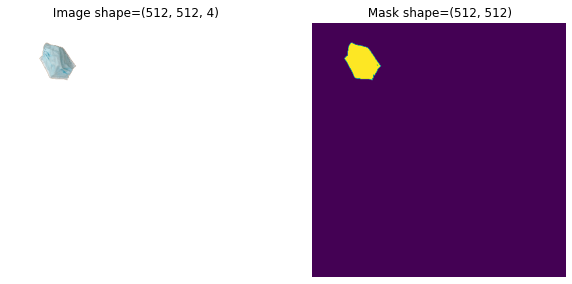

In [13]:
# Create a new foreground image as large as the composite and paste it on top
# Create a new foreground mask as large as the composite and paste it on top

def paste_foreground_image(position, fg_image, composite):
    # image of final size with foreground image
    new_fg_image = np.zeros((composite.shape[0], composite.shape[1], 4), np.uint8)
    new_fg_image[position[0]:position[0]+fg_image.shape[0],
                 position[1]:position[1]+fg_image.shape[1]] = fg_image[:,:]

    # mask of final size with foreground image
    alpha_mask = fg_image[:,:,3]
    assert np.any(alpha_mask == 0), f'foreground needs to have some transparency'
    new_alpha_mask = np.zeros((composite.shape[0], composite.shape[1]), np.uint8)
    new_alpha_mask[position[0]:position[0]+fg_image.shape[0],
                   position[1]:position[1]+fg_image.shape[1]] = alpha_mask[:,:]
    return new_fg_image, new_alpha_mask
 
paste_position=(15,35)
new_fg_image, new_alpha_mask = paste_foreground_image(paste_position, fg_image, composite)
show_image_and_mask(new_fg_image, new_alpha_mask, title='')

# Compose image and mask 

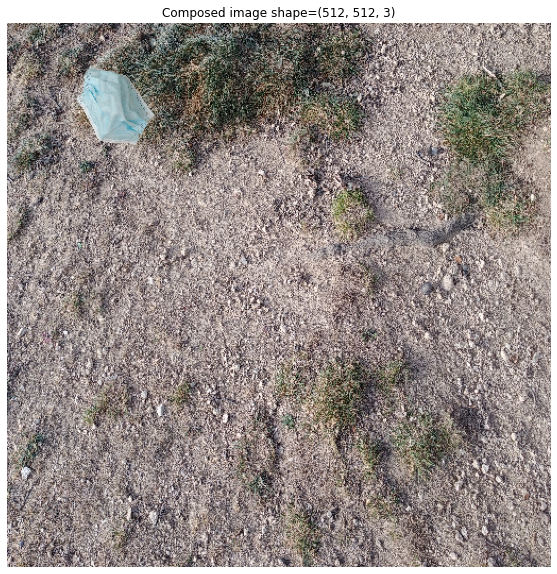

In [14]:
def compose_image(background,new_fg_image,new_alpha_mask):
    composite = crop_image(background)
    mask = np.uint8(new_alpha_mask/255.)
    composite[:,:,0] = mask * new_fg_image[:,:,0] + (1 -mask) * composite[:,:,0]
    composite[:,:,1] = mask * new_fg_image[:,:,1] + (1 -mask) * composite[:,:,1]
    composite[:,:,2] = mask * new_fg_image[:,:,2] + (1 -mask) * composite[:,:,2]
    return composite

composite = compose_image(background,new_fg_image,new_alpha_mask)
show_image(composite[:,:,:3], title='Composed image')

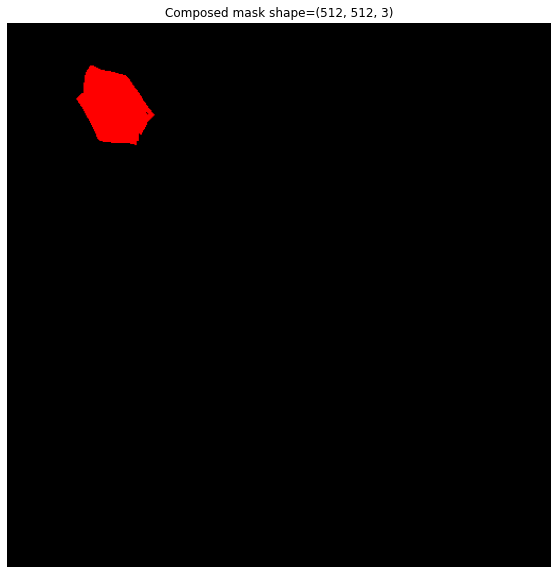

In [15]:
composite_mask = np.zeros((composite.shape[0], composite.shape[1], 3), np.uint8)
mask_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

def compose_mask(mask_color, composite_mask, new_alpha_mask):
    mask = np.uint8(new_alpha_mask/255.)
    
    # Multiply the mask value (1 or 0) by the color in each RGB channel and combine to get the mask
    red_channel = mask * mask_color[0]
    green_channel = mask * mask_color[1]
    blue_channel = mask * mask_color[2]
    rgb_mask_arr = np.dstack((red_channel, green_channel, blue_channel))
    
    composite_mask[:,:,0] = mask * rgb_mask_arr[:,:,0] + (1 -mask) * composite_mask[:,:,0]
    composite_mask[:,:,1] = mask * rgb_mask_arr[:,:,1] + (1 -mask) * composite_mask[:,:,1]
    composite_mask[:,:,2] = mask * rgb_mask_arr[:,:,2] + (1 -mask) * composite_mask[:,:,2]
    return composite_mask
composite_mask = compose_mask(mask_colors[0], composite_mask, new_alpha_mask)
show_image(composite_mask, title='Composed mask')

# Run all at once

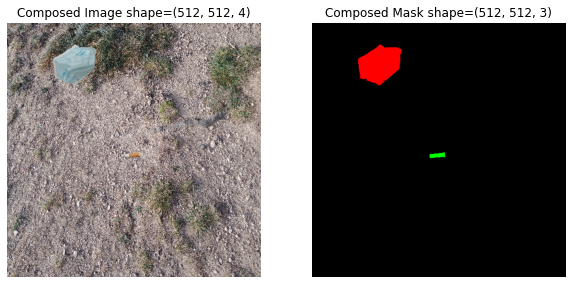

In [16]:
background_path = "../datasets/trash_composition/backgrounds/Sand, Dirt, Pebbles/20220413_083454.jpg"
foreground_path1 = "../datasets/trash_composition/foregrounds/Mask/mask/20220411_144352.png"
foreground_path2 = "../datasets/trash_composition/foregrounds/Cigarette/Cigarette/20220421_200022.png"
foregrounds = [foreground_path1, foreground_path2]
relative_scales = [1., 0.3]
mask_colors = [(255,0, 0),(0, 255, 0),(0, 0, 255)]
positions = [(10,60),(250,235)]
background = load_and_resize_image(background_path)
composite = crop_image(background)

# initialization of the composite mask
composite_mask = np.zeros((composite.shape[0], composite.shape[1], 3), np.uint8)

for i,foreground_path in enumerate(foregrounds):   
    fg_image = transform_foreground(foreground_path, relative_scales[i], composite)

    new_fg_image, new_alpha_mask = paste_foreground_image(positions[i], fg_image, composite)
    
    composite = compose_image(composite, new_fg_image, new_alpha_mask)
    
    composite_mask = compose_mask(mask_colors[i], composite_mask, new_alpha_mask)
    
show_image_and_mask(composite, composite_mask, title='Composed')